# 보스턴 지역 집값 예측

# 환경설정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset` 디렉토리에 있는 `boston.csv` 파일을 읽어오세요.
 - 상위 5개 샘플(행) 조회

In [3]:
# 코드를 입력해 주세요
df = pd.read_csv('/mnt/elice/dataset/boston.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0.00632</td>
      <td>18.0</td>
      <td>2.31</td>
      <td>NaN</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1.0</td>
      <td>296.0</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0.02731</td>
      <td>NaN</td>
      <td>7.07</td>
      <td>NaN</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>0.02729</td>
      <td>NaN</td>
      <td>7.07</td>
      <td>NaN</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>0.03237</td>
      <td>NaN</td>
      <td>2.18</td>
      <td>NaN</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>0.06905</td>
      <td>NaN</td>
      <td>2.18</td>
      <td>NaN</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
  </tbody>
</table>
</div>

## 데이터 전처리
- 컬럼별 결측치 개수를 조회하세요.

In [4]:
# 코드를 입력해 주세요
df.isna().sum()

Unnamed: 0      0
CRIM            0
ZN            372
INDUS           0
CHAS          471
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
target          0
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>Unnamed: 0      0
CRIM            0
ZN            372
INDUS           0
CHAS          471
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
target          0
dtype: int64</pre>

- 결측치를 0으로 대체하세요.
    - ZN : 25,000 평방피트를 초과하는 거주지역의 비율
    - CHAS : 찰스강 인접 유무

In [5]:
# 코드를 입력해 주세요
df['ZN'] = df['ZN'].fillna(0)
df['CHAS'] = df['CHAS'].fillna(0)
# df = df.fillna(0)
df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
target        0
dtype: int64

- Unnamed: 0 컬럼은 불필요한 컬럼이므로 제거하세요.
    - index와 동일

In [6]:
# 코드를 입력해 주세요
df = df.drop(columns = 'Unnamed: 0')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.00632</td>
      <td>18.0</td>
      <td>2.31</td>
      <td>0.0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1.0</td>
      <td>296.0</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.02731</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.02729</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.03237</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.06905</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>501</th>
      <td>0.06263</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.593</td>
      <td>69.1</td>
      <td>2.4786</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>391.99</td>
      <td>9.67</td>
      <td>22.4</td>
    </tr>
    <tr>
      <th>502</th>
      <td>0.04527</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.120</td>
      <td>76.7</td>
      <td>2.2875</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>9.08</td>
      <td>20.6</td>
    </tr>
    <tr>
      <th>503</th>
      <td>0.06076</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.976</td>
      <td>91.0</td>
      <td>2.1675</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>5.64</td>
      <td>23.9</td>
    </tr>
    <tr>
      <th>504</th>
      <td>0.10959</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.794</td>
      <td>89.3</td>
      <td>2.3889</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>393.45</td>
      <td>6.48</td>
      <td>22.0</td>
    </tr>
    <tr>
      <th>505</th>
      <td>0.04741</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.030</td>
      <td>80.8</td>
      <td>2.5050</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>7.88</td>
      <td>11.9</td>
    </tr>
  </tbody>
</table>
<p>506 rows × 14 columns</p>
</div>

- X와 Y를 분리하세요.
    - X : target 컬럼을 제외한 나머지 컬럼
    - Y : target 컬럼

In [7]:
# 코드를 입력해 주세요
X = df.iloc[:, :-1] # X = df.loc[:, 'CRIM':'LSTAT']
Y = df.iloc[:, -1] # Y = df['target']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


- 분리된 X를 출력하세요.

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.00632</td>
      <td>18.0</td>
      <td>2.31</td>
      <td>0.0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1.0</td>
      <td>296.0</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.02731</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.02729</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.03237</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.06905</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>501</th>
      <td>0.06263</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.593</td>
      <td>69.1</td>
      <td>2.4786</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>391.99</td>
      <td>9.67</td>
    </tr>
    <tr>
      <th>502</th>
      <td>0.04527</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.120</td>
      <td>76.7</td>
      <td>2.2875</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>9.08</td>
    </tr>
    <tr>
      <th>503</th>
      <td>0.06076</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.976</td>
      <td>91.0</td>
      <td>2.1675</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>5.64</td>
    </tr>
    <tr>
      <th>504</th>
      <td>0.10959</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.794</td>
      <td>89.3</td>
      <td>2.3889</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>393.45</td>
      <td>6.48</td>
    </tr>
    <tr>
      <th>505</th>
      <td>0.04741</td>
      <td>0.0</td>
      <td>11.93</td>
      <td>0.0</td>
      <td>0.573</td>
      <td>6.030</td>
      <td>80.8</td>
      <td>2.5050</td>
      <td>1.0</td>
      <td>273.0</td>
      <td>21.0</td>
      <td>396.90</td>
      <td>7.88</td>
    </tr>
  </tbody>
</table>
<p>506 rows × 13 columns</p>
</div>

- 분리된 Y를 출력하세요.

In [8]:
# 코드를 입력해 주세요
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64</pre>

- 분리된 X와 Y를 이용하여 Train과 Test로 분할하세요.
    - random_state는 0으로 지정하세요.

In [9]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

- LinearRegression 모델을 이용하여 학습 후 결과를 출력하세요
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [10]:
# 코드를 입력해 주세요
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)
# 과대적합!

(0.7697699488741149, 0.6354638433202141)

<p><strong>[출력 결과]</strong></p><pre>(0.7697699488741149, 0.6354638433202131)</pre>

- StandardScaler를 사용하여 표준화를 적용하세요.
    - 부분 변환을 적용하세요.
선형 모델은 Scale에 민감하기 때문에 수행합니다.

In [11]:
# 코드를 입력해 주세요
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 부분 변환
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

- 표준화된 데이터를 이용하여 모델을 학습하고 결과를 출력하세요.

In [12]:
# 코드를 입력해 주세요
model = LinearRegression() # 이전에 학습했던 이력이 있는 모델이니까 초기화!
model.fit(x_train_sc, y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

# 결과가 이전이랑 비슷, 표준화의 영향은 없는 것을 알 수 있다.

(0.7697699488741149, 0.6354638433202131)

<p><strong>[출력 결과]</strong></p><pre>(0.7697699488741149, 0.6354638433202133)</pre>

- 학습된 모델의 계수를 출력하세요.

In [13]:
# 코드를 입력해 주세요
pd.Series(model.coef_, index=X.columns).sort_values()

LSTAT     -3.590270
DIS       -3.002166
PTRATIO   -2.157438
TAX       -1.932890
NOX       -1.808769
CRIM      -0.971001
AGE       -0.198233
INDUS     -0.040448
CHAS       0.594088
B          0.751991
ZN         1.046678
RAD        2.080216
RM         2.609920
dtype: float64

<p><strong>[출력 결과]</strong></p><pre>NOX       -15.589421
DIS        -1.434956
PTRATIO    -0.985547
LSTAT      -0.499117
CRIM       -0.117735
TAX        -0.011297
AGE        -0.007035
INDUS      -0.005768
B           0.008444
ZN          0.044017
RAD         0.240081
CHAS        2.393416
RM          3.768968
dtype: float64</pre>

- 다음의 코드를 실행하여 잔차분석을 진행하세요.
    - 빨간 실선은 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라짐을 의미 > 선형성이 없음
    - statsmodels 모듈이 없다고 에러가 발생한다면 statsmodels 모듈을 설치하세요.
    `!pip install statsmodels`

In [14]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


/home/elicer/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


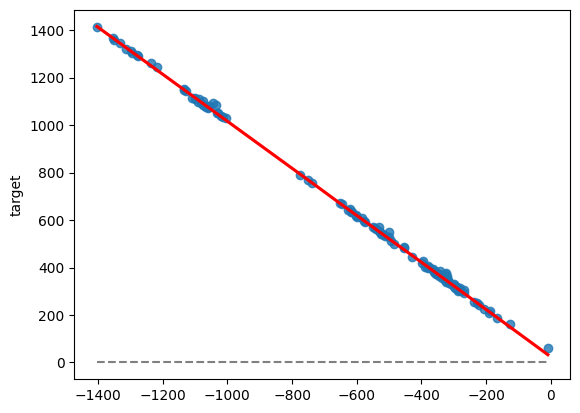

In [15]:
p_test = model.predict(x_test)
residual = y_test - p_test
sns.regplot(x=p_test, y=residual, lowess=True, line_kws={'color':'red'}) 
plt.plot([p_test.min(), p_test.max()], [0, 0], '--', color='gray')

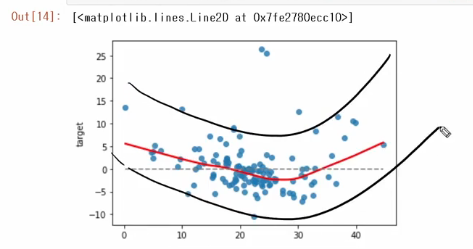
강의에서 나온 그래프임. 비선형적! 그래서 다항 변환을 적용해보자

- 다항 변환을 적용하세요.
    - 2차항으로 변환하세요.
    - 상수항은 포함하지 마세요.
    - 변환전 데이터와 변환후 데이터의 형태를 조회하세요.

In [16]:
# 코드를 입력해 주세요
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 2, include_bias = False)
X_Poly = P.fit_transform(X) # 다항 변환, 상호교차항 적용
X.shape, X_Poly.shape

((506, 13), (506, 104))

<p><strong>[출력 결과]</strong></p><pre>((506, 13), (506, 104))</pre>

- 다항변환된 데이터를 사용하여 데이터를 분리하세요.

In [17]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(X_Poly, Y, random_state = 0)

- 다항변환된 데이터를 이용하여 LinearRegression 모델을 학습 후 결과를 출력하세요
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [18]:
# 코드를 입력해 주세요
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

# 성능은 전체적으로 올랐지만, 차이가 있다 -> 과대 적합!

(0.9520519609032727, 0.6074721959718005)

<p><strong>[출력 결과]</strong></p><pre>(0.9520519609032732, 0.6074721959691866)</pre>

- 다항변환된 데이터를 이용하여 Lasso 모델을 학습 후 결과를 출력하세요
    - 규제강도는 1을 지정하세요.
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.
    

In [19]:
# 코드를 입력해 주세요
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

# 과대적합 완화 성공

/home/elicer/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


(0.9068684337013591, 0.7280316827205042)

<p><strong>[출력 결과]</strong></p><pre>(0.9068684337013593, 0.7280316827205044)</pre>

- 계수값이 0이 아닌 계수의 개수를 계산하세요.

In [20]:
# 코드를 입력해 주세요
len(model.coef_[model.coef_ != 0])

# 다항변환 해서 104개로 늘어났는데, 규제때문에 영향을 미치는 컬럼은 55개가 됨!

55

<p><strong>[출력 결과]</strong></p><pre>55</pre>

- 다항변환된 데이터를 이용하여 Ridge 모델을 학습 후 결과를 출력하세요
    - 규제강도는 100을 지정하세요.
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [21]:
# 코드를 입력해 주세요
from sklearn.linear_model import Ridge
model = Ridge(alpha = 100).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


(0.9315498119281058, 0.7554769845802503)

<p><strong>[출력 결과]</strong></p><pre>(0.9315498119280992, 0.7554769845806283)</pre>

- 계수값이 0이 아닌 계수의 개수를 계산하세요.

In [22]:
# 코드를 입력해 주세요
len(model.coef_[model.coef_ != 0])

104

<p><strong>[출력 결과]</strong></p><pre>104</pre>

## 제출

제출을 위해 본 연습문제의 데이터 전처리 및 Ridge 모델 학습 과정을 다시 수행한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- **학습 데이터와 테스트 데이터를 분리하는 함수를 이용할 때 반드시 `random_state=SEED`를 추가해야 합니다**. 이를 추가하지 않으면 제대로 채점되지 않습니다.
- 구체적으로 다음 과정만 수행하면 됩니다.
    1. 데이터 로드하기
    2. `ZN`과 `CHAS` 컬럼의 결측치를 0으로 채우기
    3. `Unnamed: 0` 컬럼 제거하기
    4. `X`와 `Y`로 분리하기
    5. `X`에 2차 다항변환을 적용하고 상수항은 포함하지 않기
    6. 다항 변환된 데이터로 학습 데이터와 테스트 데이터로 분리하기
    7. Ridge 모델 학습하기: Ridge 모델 생성할 때 **`alpha`값은 반드시 100으로 지정합니다.**
    8. 학습 데이터와 테스트 데이터의 score 제출

In [30]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_csv('/mnt/elice/dataset/boston.csv')

df['ZN'] = df['ZN'].fillna(0)
df['CHAS'] = df['CHAS'].fillna(0)

df = df.drop(columns = 'Unnamed: 0')

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

P = PolynomialFeatures( degree = 2, include_bias = False)

X_Poly = P.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(X_Poly, Y, random_state = SEED)

model = Ridge(alpha = 100).fit(x_train, y_train)

# TODO: 본 연습문제에서 위 안내에서 지정한 과정을 다시 수행하세요.
result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test)
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [31]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.013 seconds
=== Message ===
제출 완료되었습니다.


0